<a href="https://colab.research.google.com/github/shruti-sriniv/PCOS-Data-Modelling/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Importing the necessary modules in python
import numpy as np
import pandas as pd
import os

In [27]:
symptoms_df = pd.read_csv('data/PCOS_extended_dataset.csv')
print(symptoms_df.head(10))

   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0     193               193           0          30    69.979147   167.708055   
1     360               360           0          36    63.711688   154.055877   
2      10                10           0          36    51.848631   149.059804   
3     278               278           1          29    66.893988   148.628036   
4      71                71           0          33    52.536198   150.767409   
5     473               473           1          26    67.408647   165.951097   
6     397               397           0          31    68.703324   159.593469   
7     315               315           1          34    52.659470   157.495627   
8     487               487           1          30    49.764163   158.961647   
9      88                88           0          40    57.576129   156.596777   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  23.185569           12             

In [28]:
# Adding in more import statements needed for visualization and model building
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import xgboost as xgb

In [29]:
symptoms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  2000 non-null   int64  
 1   Patient File No.        2000 non-null   int64  
 2   PCOS (Y/N)              2000 non-null   int64  
 3    Age (yrs)              2000 non-null   int64  
 4   Weight (Kg)             2000 non-null   float64
 5   Height(Cm)              2000 non-null   float64
 6   BMI                     2000 non-null   float64
 7   Blood Group             2000 non-null   int64  
 8   Pulse rate(bpm)         2000 non-null   int64  
 9   RR (breaths/min)        2000 non-null   int64  
 10  Hb(g/dl)                2000 non-null   float64
 11  Cycle(R/I)              2000 non-null   int64  
 12  Cycle length(days)      2000 non-null   int64  
 13  Marraige Status (Yrs)   1997 non-null   float64
 14  Pregnant(Y/N)           2000 non-null   

Data Cleaning

In [30]:
# Make a copy to avoid SettingWithCopyWarning
symptoms_df_cleaned = symptoms_df.copy()

In [31]:
# Handle missing values in 'Marraige Status (Yrs)' with the mean
if symptoms_df_cleaned['Marraige Status (Yrs)'].isnull().any():
    symptoms_df_cleaned['Marraige Status (Yrs)'].fillna(symptoms_df_cleaned['Marraige Status (Yrs)'].mean(), inplace=True)


/tmp/ipython-input-31-2217426910.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  symptoms_df_cleaned['Marraige Status (Yrs)'].fillna(symptoms_df_cleaned['Marraige Status (Yrs)'].mean(), inplace=True)


In [32]:
# Convert 'II    beta-HCG(mIU/mL)' and 'AMH(ng/mL)' to numeric, coercing errors to NaN
for col in ['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']:
    symptoms_df_cleaned[col] = pd.to_numeric(symptoms_df_cleaned[col], errors='coerce')
    if symptoms_df_cleaned[col].isnull().any():
        # Impute NaNs created by coercion with the mean of the column
        symptoms_df_cleaned[col].fillna(symptoms_df_cleaned[col].mean(), inplace=True)


/tmp/ipython-input-32-1934559972.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  symptoms_df_cleaned[col].fillna(symptoms_df_cleaned[col].mean(), inplace=True)


In [33]:
# Drop irrelevent columns
cleaned_df = symptoms_df_cleaned.drop(columns = ['Sl. No', 'Patient File No.'] )

PCA (Principle Component Analysis)

In [34]:
# Import statments needed for PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [35]:
# Drop the target variable as PCA is unsupervised
df_features = symptoms_df_cleaned.drop(columns=['PCOS (Y/N)'])

# Identify numerical columns for PCA
numerical_cols = df_features.select_dtypes(include=np.number).columns.tolist()

# Ensure all selected columns are numeric
df_pca = df_features[numerical_cols]

In [36]:
# Data Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_pca)

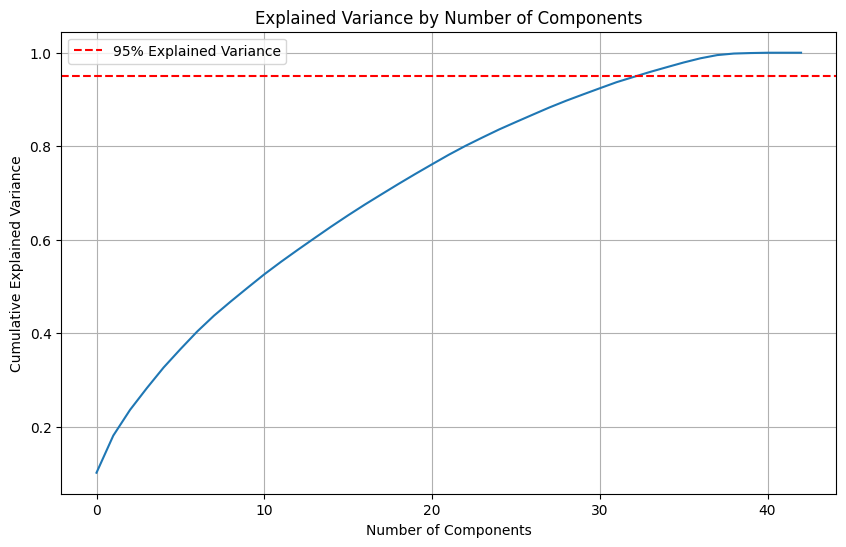


Number of components to explain 95% variance: 34


In [37]:
# PCA Application: Determine the number of components
pca_full = PCA()
pca_full.fit(scaled_features)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.show() # Use plt.show() instead of plt.savefig() to display the plot in an interactive environment

# Determine the number of components for 95% variance
n_components = np.where(np.cumsum(pca_full.explained_variance_ratio_) >= 0.95)[0][0] + 1
print(f"\nNumber of components to explain 95% variance: {n_components}")

In [38]:
# 34 components are needed to explain 95% variance out of 41 total components
# This indicates that a large portion of the dataset contains valuable information for predictive modelling

In [39]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Add the 'PCOS (Y/N)' target variable back to the PCA DataFrame
pc_df['PCOS (Y/N)'] = symptoms_df_cleaned['PCOS (Y/N)']

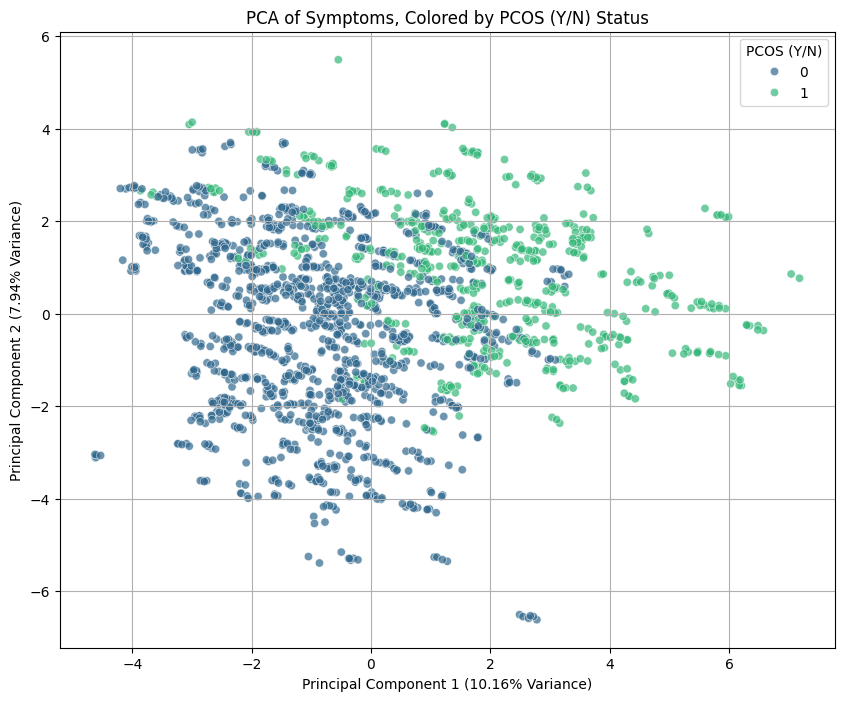


Explained variance ratio for each principal component:
PC1: 10.16%
PC2: 7.94%
PC3: 5.51%
PC4: 4.65%
PC5: 4.41%
PC6: 3.92%
PC7: 3.77%
PC8: 3.39%
PC9: 3.04%
PC10: 2.93%
PC11: 2.88%
PC12: 2.68%
PC13: 2.57%
PC14: 2.51%
PC15: 2.48%
PC16: 2.39%
PC17: 2.31%
PC18: 2.21%
PC19: 2.19%
PC20: 2.13%
PC21: 2.07%
PC22: 2.04%
PC23: 1.91%
PC24: 1.77%
PC25: 1.73%
PC26: 1.59%
PC27: 1.56%
PC28: 1.55%
PC29: 1.44%
PC30: 1.34%
PC31: 1.32%
PC32: 1.30%
PC33: 1.11%
PC34: 1.09%

First 5 rows of the Principal Components DataFrame:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.078416 -1.630539 -0.425290 -0.044234  0.852109  0.618142 -0.138754   
1 -0.486039 -0.265848  2.043161  0.118188  0.799808  1.279705 -1.241478   
2 -0.897433 -2.308426  0.972505 -0.384725 -0.345543 -1.313358  1.323179   
3  0.282338 -0.143107 -0.482278 -0.313731 -0.049511 -0.289377 -1.076744   
4 -2.199046 -3.674829 -0.685168  0.160367  0.253936 -0.076263 -0.880816   

        PC8       PC9      PC10  ...    

In [40]:
# Scatter plot of the first two principal components
if n_components >= 2:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='PCOS (Y/N)', data=pc_df, palette='viridis', alpha=0.7)
    plt.title('PCA of Symptoms, Colored by PCOS (Y/N) Status')
    plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
    plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
    plt.grid(True)
    plt.legend(title='PCOS (Y/N)')
    plt.show() # Use plt.show() instead of plt.savefig() to display the plot in an interactive environment
else:
    print("\nNot enough components to create a 2D scatter plot. At least 2 components are needed.")

# Display the explained variance ratio for each component
print("\nExplained variance ratio for each principal component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio*100:.2f}%")

# Display the first few rows of the principal components DataFrame
print("\nFirst 5 rows of the Principal Components DataFrame:")
print(pc_df.head())

In [41]:
# Since there is an overlap between the two clouds, this suggests that that while PC1 and PC2 capture the most dominant patterns in your symptom data,
# these two components alone do not provide a PERFECTLY clear separation between the PCOS and non-PCOS groups.
# However, there seems to be enough separation between the groups for the data to be statistically significant
# Furthermore, given that this is medical data, perfect predictability is not expected and we will therefore proceed with the model

In [42]:
# Create a DataFrame for the PCA loadings
# Rows are Principal Components, Columns are Original Features
loadings_df = pd.DataFrame(pca.components_, columns=numerical_cols,
                           index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Find the top 5 features contributing to PC1 (using absolute values for magnitude)
print("Top 5 features contributing to PC1 (absolute values):")
print(loadings_df.loc['PC1'].abs().sort_values(ascending=False).head(5))

# Find the top 5 features contributing to PC2 (using absolute values for magnitude)
print("\nTop 5 features contributing to PC2 (absolute values):")
print(loadings_df.loc['PC2'].abs().sort_values(ascending=False).head(5))

Top 5 features contributing to PC1 (absolute values):
Weight (Kg)         0.358267
BMI                 0.339903
Waist(inch)         0.332338
Weight gain(Y/N)    0.316003
Hip(inch)           0.313564
Name: PC1, dtype: float64

Top 5 features contributing to PC2 (absolute values):
Sl. No                  0.420929
Patient File No.        0.420929
Waist:Hip Ratio         0.304343
Hip(inch)               0.287955
Avg. F size (R) (mm)    0.256926
Name: PC2, dtype: float64


Data Modelling

In [44]:
# Separating the labels from the rest of the datset
labels = cleaned_df["PCOS (Y/N)"]
cleaned_df.drop("PCOS (Y/N)", axis=1, inplace=True)

In [45]:
# Split the dataset into training and testing data

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_df, labels, test_size=0.2, random_state=1)
print(f"Train size : {X_train.shape}")
print(f"Test size : {X_test.shape}")

Train size : (1600, 41)
Test size : (400, 41)


In [46]:
# Feature scaling for the numeric variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# Convert back to DataFrame with column names for better readability in feature importance
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [48]:
# Model initialization and training
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', # For binary classification
    eval_metric='logloss',       # Evaluation metric during training
    use_label_encoder=False,     # Suppress deprecation warning
    n_estimators=100,            # Number of boosting rounds (trees)
    learning_rate=0.1,           # Step size shrinkage to prevent overfitting
    max_depth=3,                 # Maximum depth of a tree
    subsample=0.8,               # Subsample ratio of the training instance
    colsample_bytree=0.8,        # Subsample ratio of columns when constructing each tree
    random_state=42,             # For reproducibility
    n_jobs=-1                    # Use all available CPU cores
)
xgb_model.fit(X_train_scaled_df, Y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:24:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [49]:
# Make predictions based on the model
Y_pred = xgb_model.predict(X_test_scaled_df)

In [50]:
# Predict probabilities (useful for ROC AUC curve and setting custom thresholds)
# Predicting the probaility of the positive class (PCOS)
Y_pred_proba = xgb_model.predict_proba(X_test_scaled_df)[:, 1]

In [51]:
# Adding in more import statements
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [54]:
# Calculate the accuracy of the model: correctly classified instances
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9775


In [53]:
# Calculate the precision: Of all predicted positive, how many were actually positive?
# Crucial if false positives are costly (e.g., unnecessary further tests)
precision = precision_score(Y_test, Y_pred)
print(f"Precision: {precision:.4f}")

Precision: 1.0000


In [52]:
# Calculate the recall: Of all the actual positive, how many were correctly classified?
# Crucial if false negatives are costly (e.g., a missed Diagnosis)
recall = recall_score(Y_test, Y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.9297


In [56]:
# Calculate the ROC Score
# Measures the ability of the model to distinguish between classes.
# A value of 0.5 means random guessing, 1.0 means perfect classification.
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.9983


In [58]:
le = LabelEncoder()
y_encoded = le.fit_transform(labels)


Confusion Matrix:
[[272   0]
 [  9 119]]


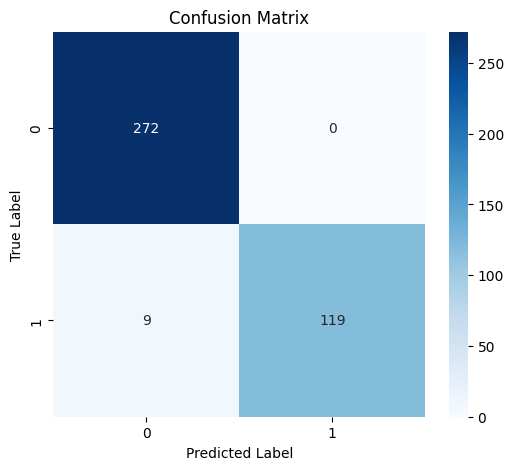

In [59]:
# Creating a confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [60]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                           param_grid=param_grid,
                           scoring='roc_auc', # Or 'f1', 'recall', etc., depending on your priority
                           cv=5,
                           n_jobs=-1,
                           verbose=1)
grid_search.fit(X_train_scaled_df, Y_train)
print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best ROC AUC score: {grid_search.best_score_:.4f}")
best_xgb_model = grid_search.best_estimator_


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:35:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.7}
Best ROC AUC score: 0.9992
